In [3]:
# Week 5: Final Visualizations & Interpretation (Brianna)

# This notebook builds on the Week 4 exploratory data analysis (EDA) and focuses on
# Final visualizations and interpretations that directly address our research questions:

# 1. What factors (genre, budget, runtime, or release year) most strongly influence a movie’s popularity and ratings?
# 2. How do audience ratings on IMDb compare to TMDB’s popularity scores for the same films?
# 3. How can an end-to-end, reproducible data pipeline be designed to ethically collect, integrate, clean, and analyze movie datasets from multiple sources of data?

# Week 4 focused on:
# - Initial distributions, correlations, and raw scatter plots.
# - Diagnosing skewness, outliers, and highlighting missing data.
# - Confirming that the integrated dataset (`merged_movies.csv`) looked reasonable.

# Week 5 focuses on:
# - Creating cleaner, more interpretable plots (especially with simplifying genres to ensure clarity and readability).
# - Quantifying relationships (correlations, group statistics, etc.)
# - Writing  clear interpretations that will feed into the final project report.

In [1]:
# Week 5: Final Visualizations & Interpretation

# This cell imports required libraries and loads the integrated dataset
# created in Week 3. All analysis in this notebook is based on the
# merged_movies.csv file produced by the reproducible integration pipeline.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# First I will load the integrated dataset created in Week 3
df = pd.read_csv("integration_output/merged_movies.csv")

# Here I generate a quick preview to confirm the structure (title, genres, ratings, popularity, budget, etc.)
df.head()

,title,release_year,director,genre_imdb,genre_tmdb,rating_imdb,vote_average_tmdb,vote_count_tmdb,budget_in_millions,revenue_in_millions,gross_in_millions,popularity,runtime_imdb,runtime_tmdb,metascore,_merge_status
0,The Shawshank Redemption,1994,Frank Darabont,Drama,"Crime, Drama",9.3,8.5,8205.0,25.00,28.341469,28.34,136.747729,142,142.0,82,both
1,The Godfather,1972,Francis Ford Coppola,"Crime, Drama","Crime, Drama",9.2,8.4,5893.0,6.00,245.066411,134.97,143.659698,175,175.0,100,both
2,The Dark Knight,2008,Christopher Nolan,"Action, Crime, Drama","Action, Crime, Drama, Thriller",9.0,8.2,12002.0,185.00,1004.558444,534.86,187.322927,152,152.0,84,both
3,Schindler's List,1993,Steven Spielberg,"Biography, Drama, History","Drama, History, War",9.0,8.3,4329.0,22.00,321.365567,96.90,104.469351,195,195.0,95,both
4,12 Angry Men,1957,Sidney Lumet,"Crime, Drama",Drama,9.0,8.2,2078.0,0.35,1.000000,4.36,59.259204,96,96.0,97,both


In [4]:
# To make our Week 5 visualizations clearer, I simplify genres into a
# smaller set of higher-level categories. This avoids extremely long legends
# like "Action, Adventure, Fantasy" and helps us focus on broad/general patterns.

def simplify_genre(genre):
    genre = str(genre).lower()

    if "drama" in genre:
        return "Drama"
    elif "action" in genre:
        return "Action"
    elif "comedy" in genre:
        return "Comedy"
    elif "romance" in genre:
        return "Romance"
    elif "thriller" in genre:
        return "Thriller"
    elif "sci" in genre:  
        return "Sci-Fi"
    elif "fantasy" in genre:
        return "Fantasy"
    elif "animation" in genre:
        return "Animation"
    elif "horror" in genre:
        return "Horror"
    elif "crime" in genre:
         return "Crime"
    else:
        return "Other"

# Here I apply the changes to the IMDb genre column (you could also use the TMDB column, but I am staying consistent with Week 4)
df["genre_simple"] = df["genre_imdb"].apply(simplify_genre)

# Now I create log-transformed budget and revenue to handle strong right skew and to ease readibility.
df["log_budget"] = np.log10(df["budget_in_millions"] + 1e-6)
df["log_revenue"] = np.log10(df["revenue_in_millions"] + 1e-6)

# Create a simple return-on-investment (ROI) metric when both budget & revenue exist
df["roi"] = df["revenue_in_millions"] / df["budget_in_millions"]

# These are the main columns we will use in several plots below. 
df[["title", "genre_imdb", "genre_simple", "budget_in_millions", "revenue_in_millions", "log_budget", "log_revenue", "roi"]].head()

,title,genre_imdb,genre_simple,budget_in_millions,revenue_in_millions,log_budget,log_revenue,roi
0,The Shawshank Redemption,Drama,Drama,25.00,28.341469,1.397940,1.452422e+00,1.133659
1,The Godfather,"Crime, Drama",Drama,6.00,245.066411,0.778151,2.389284e+00,40.844402
2,The Dark Knight,"Action, Crime, Drama",Drama,185.00,1004.558444,2.267172,3.001975e+00,5.430046
3,Schindler's List,"Biography, Drama, History",Drama,22.00,321.365567,1.342423,2.506999e+00,14.607526
4,12 Angry Men,"Crime, Drama",Drama,0.35,1.000000,-0.455931,4.342943e-07,2.857143


In [6]:
# Popularity and Ratings by Genre

# This section directly addresses Research Question 1:
# What factors (genre, budget, runtime, or release year) most strongly influence a movie’s popularity and ratings?

# I start by comparing IMDb ratings and TMDB popularity across our simplified
# genre categories. This helps us see whether certain genres consistently attract
# higher ratings or more attention from viewers.

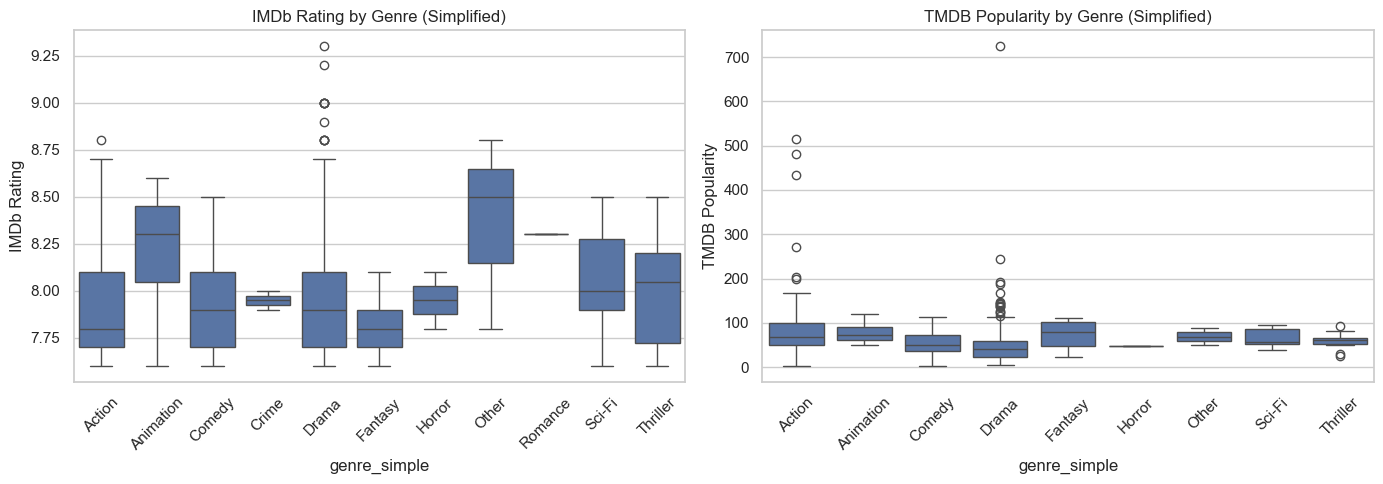

rating_imdb              popularity                 
                    mean median count       mean     median count
genre_simple                                                     
Other           8.366667   8.50     3  68.855107  68.855107     2
Romance         8.300000   8.30     1        NaN        NaN     0
Animation       8.200000   8.30     4  78.770135  73.280997     4
Sci-Fi          8.040000   8.00    10  65.709570  56.105798     5
Thriller        8.016667   8.05    18  59.933200  62.292663    10
Drama           7.965996   7.90   497  50.648943  40.069732   256
Crime           7.950000   7.95     2        NaN        NaN     0
Horror          7.950000   7.95     2  47.584643  47.584643     1
Action          7.914286   7.80    91  98.972857  67.462104    56
Comedy          7.903125   7.90    64  53.514364  48.903414    44
Fantasy         7.823077   7.80    13  74.049100  79.679601     9

In [7]:
# Filter rows where we have both IMDb rating and simplified genre
genre_ratings = df.dropna(subset=["rating_imdb", "genre_simple"])
genre_pop = df.dropna(subset=["popularity", "genre_simple"])

plt.figure(figsize=(14, 5))

# IMDb rating by genre
plt.subplot(1, 2, 1)
sns.boxplot(
    data=genre_ratings,
    x="genre_simple",
    y="rating_imdb",
    order=sorted(genre_ratings["genre_simple"].unique())
)
plt.title("IMDb Rating by Genre (Simplified)")
plt.xticks(rotation=45)
plt.ylabel("IMDb Rating")

# Popularity by genre
plt.subplot(1, 2, 2)
sns.boxplot(
    data=genre_pop,
    x="genre_simple",
    y="popularity",
    order=sorted(genre_pop["genre_simple"].unique())
)
plt.title("TMDB Popularity by Genre (Simplified)")
plt.xticks(rotation=45)
plt.ylabel("TMDB Popularity")

plt.tight_layout()
plt.show()

# Here I conduct a quick group statistics for interpretation
genre_summary = (
    df.groupby("genre_simple")[["rating_imdb", "popularity"]]
      .agg(["mean", "median", "count"])
      .sort_values(("rating_imdb", "mean"), ascending=False)
)

genre_summary

In [ ]:
# Budget, Revenue, and ROI vs Popularity and Ratings

# Now I will explore how financial factors relate to ratings and popularity:

# - Do higher-budget movies earn higher revenue and popularity?
# - Are big-budget films always highly rated?
# - How does return on investment (ROI) behave?

# This continues to support Research Question 1 by focusing on budget and financial performance as potential drivers of ratings and popularity.

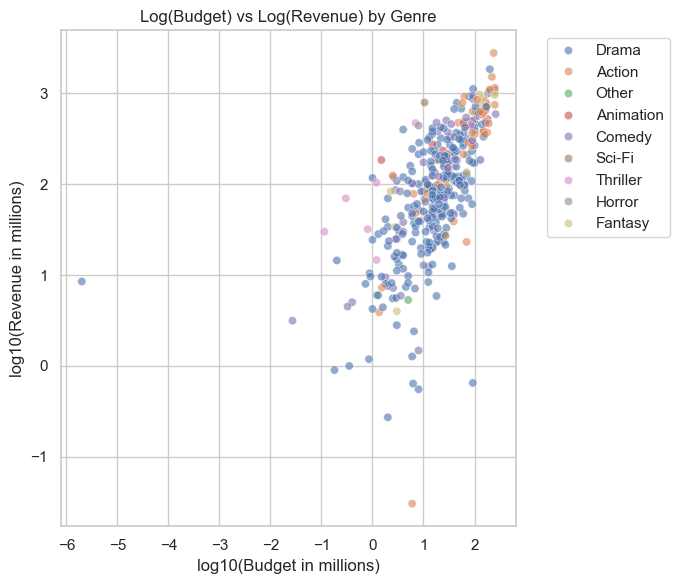

,budget_in_millions,revenue_in_millions
budget_in_millions,1.000000,0.772612
revenue_in_millions,0.772612,1.000000


In [8]:
# Here I will gather the subset rows where budget and revenue are both available and positive values.
fin = df[(df["budget_in_millions"] > 0) & (df["revenue_in_millions"] > 0)].copy()

plt.figure(figsize=(7, 6))
sns.scatterplot(
    data=fin,
    x="log_budget",
    y="log_revenue",
    hue="genre_simple",
    alpha=0.6
)
plt.title("Log(Budget) vs Log(Revenue) by Genre")
plt.xlabel("log10(Budget in millions)")
plt.ylabel("log10(Revenue in millions)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Correlation between raw budget and revenue for reference
fin[["budget_in_millions", "revenue_in_millions"]].corr()

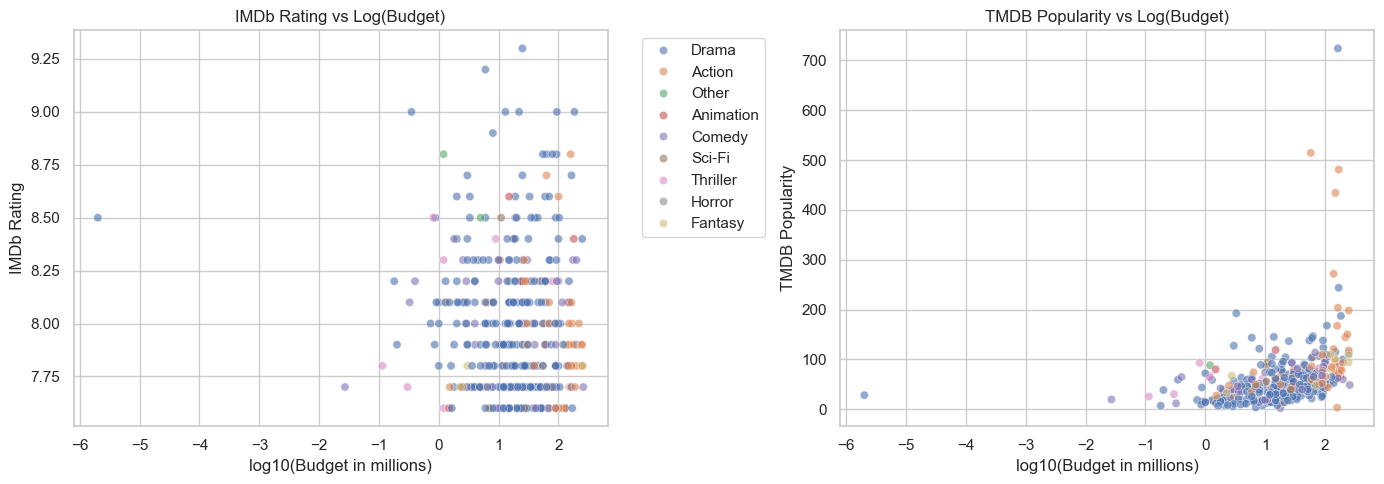

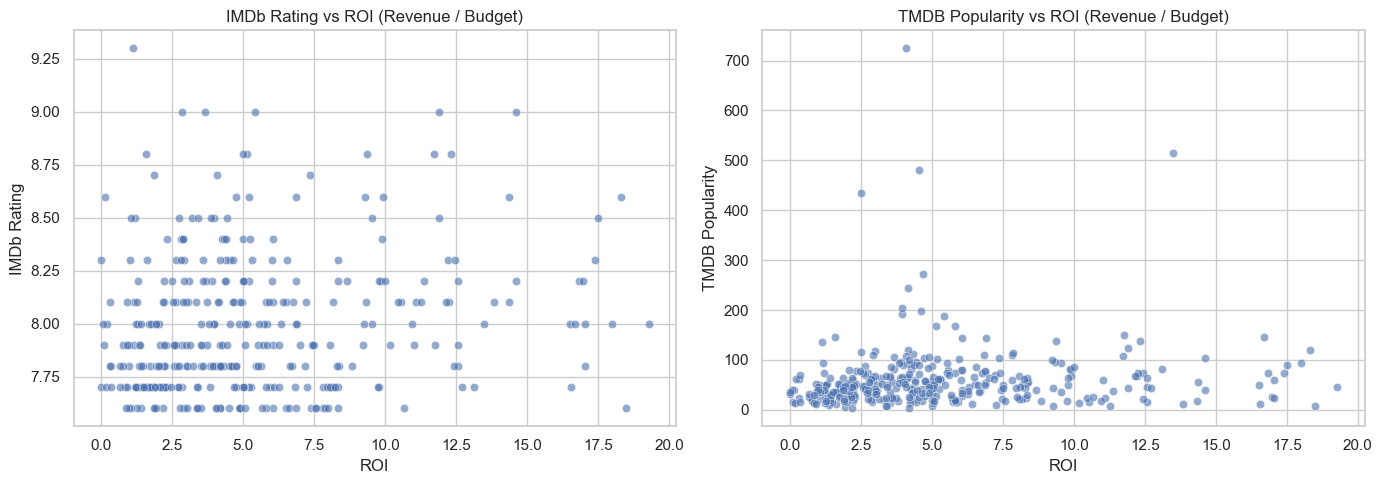

In [9]:
# Rating vs log-budget
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(
    data=fin,
    x="log_budget",
    y="rating_imdb",
    hue="genre_simple",
    alpha=0.6
)
plt.title("IMDb Rating vs Log(Budget)")
plt.xlabel("log10(Budget in millions)")
plt.ylabel("IMDb Rating")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

# Popularity vs log-budget
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=fin,
    x="log_budget",
    y="popularity",
    hue="genre_simple",
    alpha=0.6
)
plt.title("TMDB Popularity vs Log(Budget)")
plt.xlabel("log10(Budget in millions)")
plt.ylabel("TMDB Popularity")
plt.legend().remove()

plt.tight_layout()
plt.show()

# ROI vs rating and popularity (filtering out extreme ROI values to reduce distortion and to ensure findings arent biased to movies with confounding variables like marketing, fan base, etc.)
roi_subset = fin[fin["roi"].between(0, 20)]

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(
    data=roi_subset,
    x="roi",
    y="rating_imdb",
    alpha=0.6
)
plt.title("IMDb Rating vs ROI (Revenue / Budget)")
plt.xlabel("ROI")
plt.ylabel("IMDb Rating")

plt.subplot(1, 2, 2)
sns.scatterplot(
    data=roi_subset,
    x="roi",
    y="popularity",
    alpha=0.6
)
plt.title("TMDB Popularity vs ROI (Revenue / Budget)")
plt.xlabel("ROI")
plt.ylabel("TMDB Popularity")

plt.tight_layout()
plt.show()

In [ ]:
# Runtime and Release Year as Factors

# Here I examine two additional potential drivers from Research Question 1:

# - Runtime: Are longer movies rated higher or lower?
# - Release Year: Are newer films more popular due to recency and online engagement?

# I use scatterplots and time trends to explore these patterns.

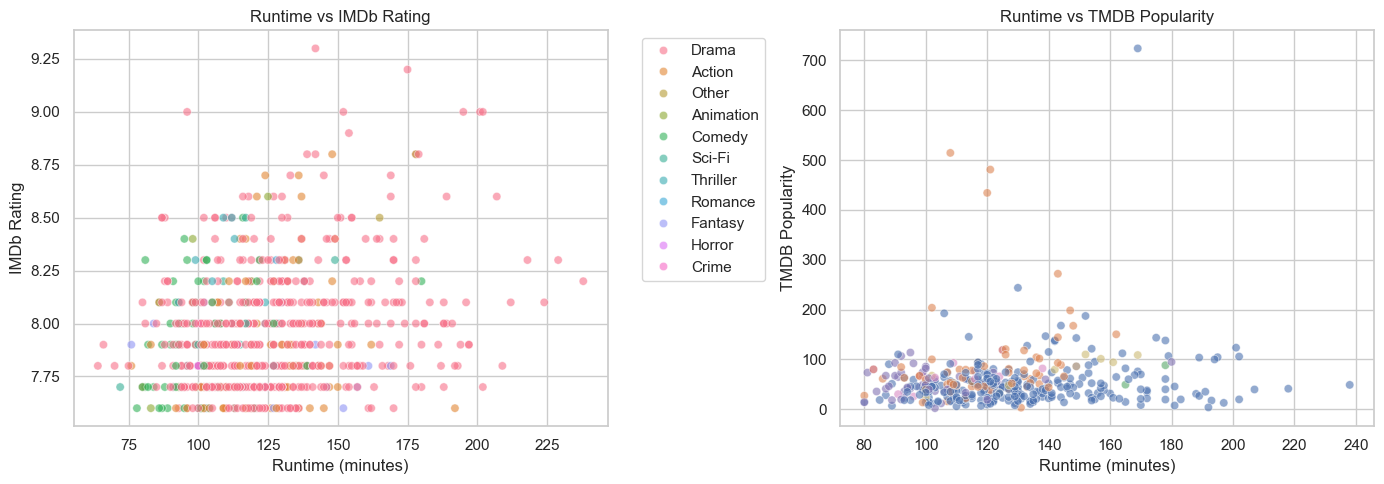

,runtime_imdb,rating_imdb,popularity
runtime_imdb,1.000000,0.289240,0.098781
rating_imdb,0.289240,1.000000,0.292229
popularity,0.098781,0.292229,1.000000


In [10]:
runtime_subset = df.dropna(subset=["runtime_imdb", "rating_imdb"])

plt.figure(figsize=(14, 5))

# Runtime vs IMDb rating
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=runtime_subset,
    x="runtime_imdb",
    y="rating_imdb",
    hue="genre_simple",
    alpha=0.6
)
plt.title("Runtime vs IMDb Rating")
plt.xlabel("Runtime (minutes)")
plt.ylabel("IMDb Rating")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

# Runtime vs popularity
runtime_pop = df.dropna(subset=["runtime_imdb", "popularity"])

plt.subplot(1, 2, 2)
sns.scatterplot(
    data=runtime_pop,
    x="runtime_imdb",
    y="popularity",
    hue="genre_simple",
    alpha=0.6
)
plt.title("Runtime vs TMDB Popularity")
plt.xlabel("Runtime (minutes)")
plt.ylabel("TMDB Popularity")
plt.legend().remove()

plt.tight_layout()
plt.show()

# Simple correlations for reference
runtime_pop[["runtime_imdb", "rating_imdb", "popularity"]].corr()

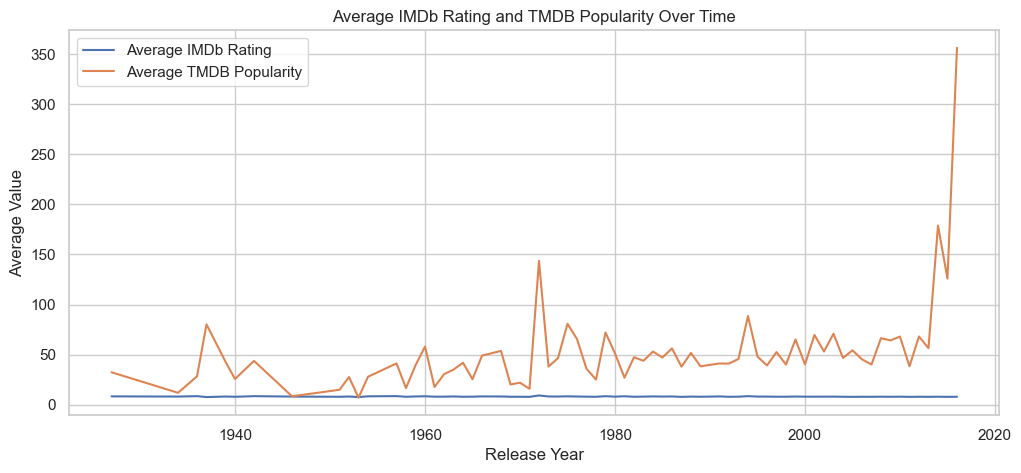

,release_year,rating_imdb,popularity
66,2012,7.921429,68.074367
67,2013,7.843750,56.430272
68,2014,7.943750,178.899018
69,2015,7.828571,125.859672
70,2016,7.900000,356.471176


In [11]:
# Here I focus on rows with year + key outcome variables
time_subset = df.dropna(subset=["release_year", "rating_imdb", "popularity"]).copy()
time_subset["release_year"] = time_subset["release_year"].astype(int)

# Compute average rating and popularity by year
year_summary = (
    time_subset
    .groupby("release_year")[["rating_imdb", "popularity"]]
    .mean()
    .reset_index()
)

plt.figure(figsize=(12, 5))

sns.lineplot(
    data=year_summary,
    x="release_year",
    y="rating_imdb",
    label="Average IMDb Rating"
)
sns.lineplot(
    data=year_summary,
    x="release_year",
    y="popularity",
    label="Average TMDB Popularity",
)
plt.title("Average IMDb Rating and TMDB Popularity Over Time")
plt.xlabel("Release Year")
plt.ylabel("Average Value")
plt.legend()
plt.show()

year_summary.tail()

In [ ]:
# Alignment Between IMDb Ratings and TMDB Popularity

# This section directly targets Research Question 2:

# How do audience ratings on IMDb compare to TMDB’s popularity scores for the same films?

# I will treat ratings and popularity like the following:
# - `rating_imdb` as a more traditional rating metric.
# - `popularity` as a proxy for attention or engagement on TMDB.

# Below I examine their relationship numerically and visually.

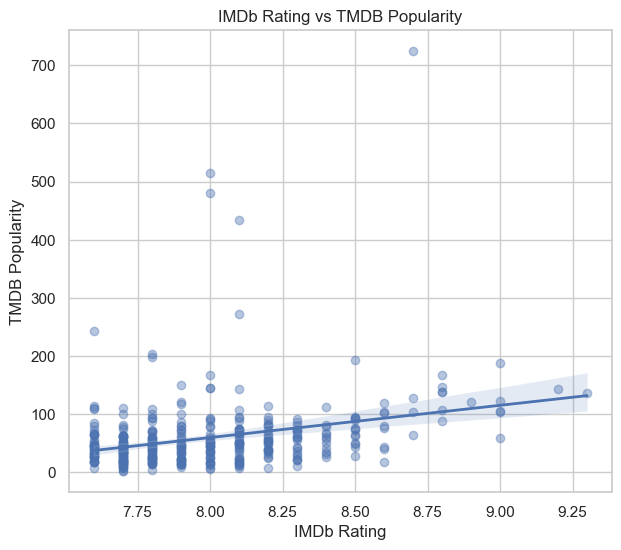

Correlation between IMDb rating and TMDB popularity: 0.292


rating_imdb             popularity           
             rating_imdb popularity rating_imdb popularity
genre_simple                                              
Action               1.0   0.212554    0.212554        1.0
Animation            1.0   0.332883    0.332883        1.0
Comedy               1.0   0.361376    0.361376        1.0
Drama                1.0   0.405111    0.405111        1.0
Fantasy              1.0  -0.049057   -0.049057        1.0
Horror               NaN        NaN         NaN        NaN
Other                1.0   1.000000    1.000000        1.0
Sci-Fi               1.0   0.886048    0.886048        1.0
Thriller             1.0   0.612033    0.612033        1.0

In [12]:
ratings_pop = df.dropna(subset=["rating_imdb", "popularity"]).copy()

plt.figure(figsize=(7, 6))
sns.regplot(
    data=ratings_pop,
    x="rating_imdb",
    y="popularity",
    scatter_kws={"alpha": 0.4},
    line_kws={"linewidth": 2}
)
plt.title("IMDb Rating vs TMDB Popularity")
plt.xlabel("IMDb Rating")
plt.ylabel("TMDB Popularity")
plt.show()

# Overall correlation
corr_rating_pop = ratings_pop[["rating_imdb", "popularity"]].corr().iloc[0, 1]
print(f"Correlation between IMDb rating and TMDB popularity: {corr_rating_pop:.3f}")

# Correlation by simplified genre (for further implications or areas of interest)
genre_corr = (
    ratings_pop
    .groupby("genre_simple")[["rating_imdb", "popularity"]]
    .corr()
    .unstack()
)
genre_corr

In [ ]:
# Reproducible, Ethical, End-to-End Pipeline

# This section supports Research Question 3:

# How can an end-to-end, reproducible data pipeline be designed to ethically collect, integrate, clean, and analyze movie datasets from multiple sources of data?

# Key elements of our pipeline:

#   - Ethical Data Use & Licensing
#   - Datasets acquired from Kaggle (IMDb Top 1000 & TMDB movie metadata).
#   - Documented that both are secondary, official exports and are used only for academic purposes.
#   - Included clear attribution, usage constraints, and links back to original sources in the Data Documentation folder and final README.

# Structured Data Lifecycle:

#   - Week 1: Acquisition + ethical review.
#   - Week 2: Data cleaning via OpenRefine (exploration) and Python scripts (reproducible transformations).
#   - Week 3: Integration pipeline with explicit schema mapping, exact matching, and fuzzy matching, with provenance tracked in `merge_log.json`.
#   - Week 4: Exploratory data analysis (EDA) to understand distributions, missingness, and basic relationships.
#   - Week 5: Final visualizations + interpretation aligned with research questions.

# Reproducibility & Transparency Practices:
#   - All cleaning, integration, and analysis steps implemented in `.ipynb` and mirrored as `.py` scripts.
#   - OpenRefine history files preserved to document exploratory steps.
#   - Integration outputs (`merged_movies.csv`, `merge_log.json`) stored in a dedicated `integration_output/` folder.
#   - EDA and Week 5 analyses separated into their own folders, with week 4 being in `data_analysis/` , and week 5 being in 'data_visualizations/' for clarity, as week 4 was initial analysis, and week 5 honed in finalizing visualizations along with analysis.
#   - Comments throughout notebooks explain why each step is performed and how it connects to our research questions.

# These decisions collectively support computational reproducibility:
# anyone with access to the same input datasets can rerun our scripts to obtain
# the same `merged_movies.csv` and repeat the analyses shown in all notebook.

In [ ]:
# Summary of Week 5 Findings (Brianna)

# This section provides a concise summary of the key insights drawn from the final visualizations.  
# Detailed interpretation, implications, and connections to prior work are discussed more fully in  
# Week_5_Final_Analysis.md.


# Research Question 1  
# What factors (genre, budget, runtime, or release year) most strongly influence a movie’s popularity and ratings?

# Genre:
# - Simplified genre groupings reveal clear differences in both ratings and popularity.
# - Drama and crime-related films tend to have slightly higher median IMDb ratings.
# - Action, Sci-Fi, and Animation films often achieve higher TMDB popularity, even when ratings are more moderate, suggesting these genres attract broader attention rather than consistent critical acclaim.

# Budget & Revenue:
# - Budget and revenue show a strong positive relationship, especially after log transformation.
# - Higher budgets are associated with higher popularity, but not consistently higher ratings.
# - ROI analysis indicates that increased spending does not guarantee proportional financial or critical success.

# Runtime:
# - Runtime has only a weak relationship with popularity and a mild relationship with ratings.
# - Highly rated films tend to cluster around typical feature-length runtimes, with no clear advantage to being significantly longer.

# Release Year:
# - Average TMDB popularity increases for more recent films, likely reflecting platform growth and engagement trends.
# - IMDb ratings remain relatively stable across time, suggesting recency affects visibility more than perceived quality.

# Research Question 2  
# How do IMDb ratings compare to TMDB popularity scores for the same films?

# - The relationship between IMDb rating and TMDB popularity is moderately positive but far from linear.
# - Higher-rated movies are often more popular, but many exceptions exist:
#   - Some films are critically well-received but relatively niche.
#   - Others achieve high popularity despite only average ratings.
#   - Genre-specific patterns show that popularity is influenced by factors beyond audience rating alone.

# Research Question 3  
# How can an end-to-end, reproducible data pipeline be designed for multi-source movie analysis?

# - This project demonstrates a full, reproducible workflow including:
#   1. Ethical data acquisition with documented licensing considerations.
#   2. Transparent data cleaning using exploratory tools and reproducible Python scripts.
#   3. Documented integration processes with exact and fuzzy matching plus merge logs.
#   4. Structured analysis separating EDA from final interpretation.
#   5. Reproducible artifacts including notebooks, scripts, CSV outputs, and written reports.

# Overall, Week 5 builds on the exploratory findings from Week 4 by producing focused, polished visualizations and directly answering the project’s research questions.  
# Further discussion of implications, limitations, and future directions is provided in my Week_5_Final_Analysis.md.